## (5) Model Training

### (5.1) Import Relevant Libraries for Model Trainig

In [33]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
import joblib

### (5.2) Load Preprocessed Data

In [3]:
df = pd.read_csv('data/processed_data.csv')
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month,house_age
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,...,0,1955,0,47.5112,-122.257,1340,5650,2014,10,59
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,...,400,1951,1991,47.7210,-122.319,1690,7639,2014,12,63
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,...,0,1933,0,47.7379,-122.233,2720,8062,2015,2,82
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,...,910,1965,0,47.5208,-122.393,1360,5000,2014,12,49
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,...,0,1987,0,47.6168,-122.045,1800,7503,2015,2,28


### (5.3) Split Dependent and Independent Feature

In [4]:
# Input Variable or Independent Features
X = df.drop('price', axis=1)

# Output Variable or Dependent Feature
y = df['price']

In [5]:
# Take a look on indepented features (without scaling)
X

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month,house_age
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,2014,10,59
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639,2014,12,63
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062,2015,2,82
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000,2014,12,49
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503,2015,2,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,47.6993,-122.346,1530,1509,2014,5,5
21609,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,47.5107,-122.362,1830,7200,2015,2,1
21610,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,47.5944,-122.299,1020,2007,2014,6,5
21611,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,47.5345,-122.069,1410,1287,2015,1,11


In [6]:
# Take a look on dependent feature
y

0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21608    360000.0
21609    400000.0
21610    402101.0
21611    400000.0
21612    325000.0
Name: price, Length: 21613, dtype: float64

### (5.4) Separate Train and Test Data

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# shape of all train and test data varibales
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(17290, 20)
(4323, 20)
(17290,)
(4323,)


### (5.5) Scaling the features

In [8]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Take a look on indepented features (with scaling)
X_train

array([[-0.39526335, -0.47445144, -0.32393262, ..., -0.68884041,
        -0.50783343, -0.41490958],
       [-1.46896378, -1.45258323, -1.18365301, ...,  1.45171507,
        -1.15040653,  1.45352058],
       [-0.39526335, -1.45258323, -1.09547656, ...,  1.45171507,
        -1.47169308,  1.01189163],
       ...,
       [-0.39526335,  0.50368036,  0.05081729, ..., -0.68884041,
         0.77731276, -1.12831019],
       [-2.54266422, -1.77862716, -1.8670205 , ..., -0.68884041,
        -0.18654689,  0.26451957],
       [ 0.67843709,  0.50368036,  1.16404497, ...,  1.45171507,
        -1.15040653, -1.16228164]])

In [9]:
X_test

array([[ 0.67843709,  0.17763643, -0.00429299, ..., -0.68884041,
         1.09859931, -0.51682395],
       [ 1.75213752,  1.15576822,  0.91053768, ..., -0.68884041,
         0.45602621, -0.21108084],
       [ 0.67843709,  0.50368036,  1.86945657, ..., -0.68884041,
         0.45602621, -0.89050998],
       ...,
       [ 0.67843709,  0.50368036,  0.39690986, ..., -0.68884041,
         1.09859931, -1.23022456],
       [ 0.67843709, -0.47445144,  0.19410402, ..., -0.68884041,
         1.7411724 ,  0.12863374],
       [ 0.67843709,  0.50368036,  0.54680982, ..., -0.68884041,
         1.7411724 , -1.26419602]])

## (6) Trainig and Model Selection

### (6.1) Create an Evaluate Function to give all metrics after model Training

In [10]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, mse, rmse, r2_square

In [13]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(),
    "AdaBoost Regressor": AdaBoostRegressor(),
    "SVR": SVR()
}
model_list = []
r2_list =[]

In [14]:
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluate Train and Test dataset
    model_train_mae, model_train_mse, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae, model_test_mse, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)


    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model performance for Training set')
    print("- Mean Squared Error: {:.4f}".format(model_train_mse))
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('---------------------------------------')

    print('Model performance for Test set')
    print("- Mean Squared Error: {:.4f}".format(model_test_mse))
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)

    print('='*40)
    print('\n')

Linear Regression
Model performance for Training set
- Mean Squared Error: 39636046789.5942
- Root Mean Squared Error: 199088.0378
- Mean Absolute Error: 125291.2964
- R2 Score: 0.6966
---------------------------------------
Model performance for Test set
- Mean Squared Error: 45748422978.9126
- Root Mean Squared Error: 213888.8098
- Mean Absolute Error: 127896.3480
- R2 Score: 0.6974


Lasso
Model performance for Training set
- Mean Squared Error: 39629571376.2804
- Root Mean Squared Error: 199071.7744
- Mean Absolute Error: 125072.5604
- R2 Score: 0.6967
---------------------------------------
Model performance for Test set
- Mean Squared Error: 45778183163.4865
- Root Mean Squared Error: 213958.3678
- Mean Absolute Error: 127642.6476
- R2 Score: 0.6972


Ridge
Model performance for Training set
- Mean Squared Error: 39629571475.0717
- Root Mean Squared Error: 199071.7747
- Mean Absolute Error: 125070.6275
- R2 Score: 0.6967
---------------------------------------
Model performance f

### (6.2) Result

In [15]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
6,XGBRegressor,0.870063
5,Random Forest Regressor,0.849386
3,K-Neighbors Regressor,0.776483
4,Decision Tree,0.714795
0,Linear Regression,0.697384
1,Lasso,0.697188
2,Ridge,0.697186
7,AdaBoost Regressor,0.096417
8,SVR,-0.063243


## XGBoost Regression

In [16]:
xgbr = XGBRegressor()
xgbr.fit(X_train, y_train)
y_pred = xgbr.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(f"Accuracy of the model is {score:.2f}%")

Accuracy of the model is 87.01%


Text(0.5, 1.0, 'XGBoost Regression Plot')

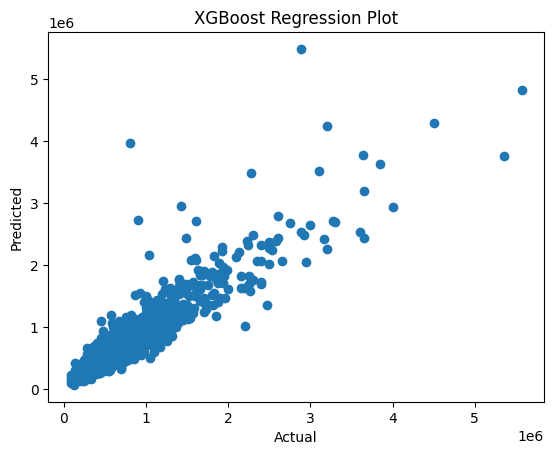

In [17]:
# plot y_test and y_pred
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title("XGBoost Regression Plot")

<Axes: xlabel='price'>

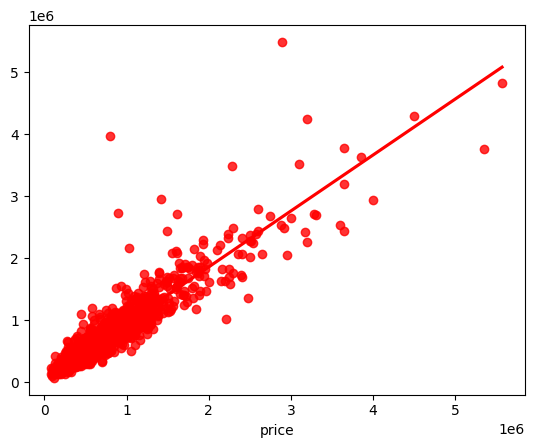

In [18]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red')

### Difference between Actual and Predicted Values

In [19]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
735,365000.0,4.062162e+05,-41216.18750
2830,865000.0,8.662865e+05,-1286.50000
4106,1038000.0,1.093808e+06,-55808.37500
16218,1490000.0,1.702278e+06,-212278.12500
19964,711000.0,7.586874e+05,-47687.37500
...,...,...,...
13674,338000.0,3.468142e+05,-8814.21875
20377,673000.0,7.145984e+05,-41598.37500
8805,285000.0,3.219555e+05,-36955.46875
10168,605000.0,5.898708e+05,15129.18750


## Hyperparameter Tuning on XGBoost Regressor

In [20]:
# XGBRegressor
xgb = XGBRegressor()
xgb_param = {
    'n_estimators': [100, 500, 1000],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3]
}

xgb_grid = GridSearchCV(xgb, xgb_param, cv=5, n_jobs=-1)
xgb_grid.fit(X_train, y_train)

print(f"Best parameters for XGBRegressor: {xgb_grid.best_params_}")
print(f"Best score for XGBRegressor: {xgb_grid.best_score_}")

Best parameters for XGBRegressor: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 1000}
Best score for XGBRegressor: 0.899768736421102


In [21]:
# Implementing the best parameters for XGBRegressor
xgb = XGBRegressor(n_estimators=1000, max_depth=3, learning_rate=0.1)
xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [22]:
# Make predictions
y_train_pred = xgb.predict(X_train)
y_test_pred = xgb.predict(X_test)

In [23]:
# Evaluate Train and Test dataset
xgb_train_mae, xgb_train_mse, xgb_train_rmse, xgb_train_r2 = evaluate_model(y_train, y_train_pred)

xgb_test_mae, xgb_test_mse, xgb_test_rmse, xgb_test_r2 = evaluate_model(y_test, y_test_pred)

In [24]:
print('XGBRegressor')
print('Model performance for Training set')
print("- Mean Squared Error: {:.4f}".format(xgb_train_rmse))
print("- Root Mean Squared Error: {:.4f}".format(xgb_train_rmse))
print("- Mean Absolute Error: {:.4f}".format(xgb_train_mae))
print("- R2 Score: {:.4f}".format(xgb_train_r2))

print('---------------------------------------')

print('Model performance for Test set')
print("- Mean Squared Error: {:.4f}".format(xgb_test_mse))
print("- Root Mean Squared Error: {:.4f}".format(xgb_test_rmse))
print("- Mean Absolute Error: {:.4f}".format(xgb_test_mae))
print("- R2 Score: {:.4f}".format(xgb_test_r2))

XGBRegressor
Model performance for Training set
- Mean Squared Error: 78086.4390
- Root Mean Squared Error: 78086.4390
- Mean Absolute Error: 52687.4423
- R2 Score: 0.9533
---------------------------------------
Model performance for Test set
- Mean Squared Error: 22163284209.4856
- Root Mean Squared Error: 148873.3831
- Mean Absolute Error: 70602.4768
- R2 Score: 0.8534


In [25]:
score = r2_score(y_test, y_test_pred)*100
print(f"Accuracy of the model is {score:.2f}%")

Accuracy of the model is 85.34%


Text(0.5, 1.0, 'Feature Importance')

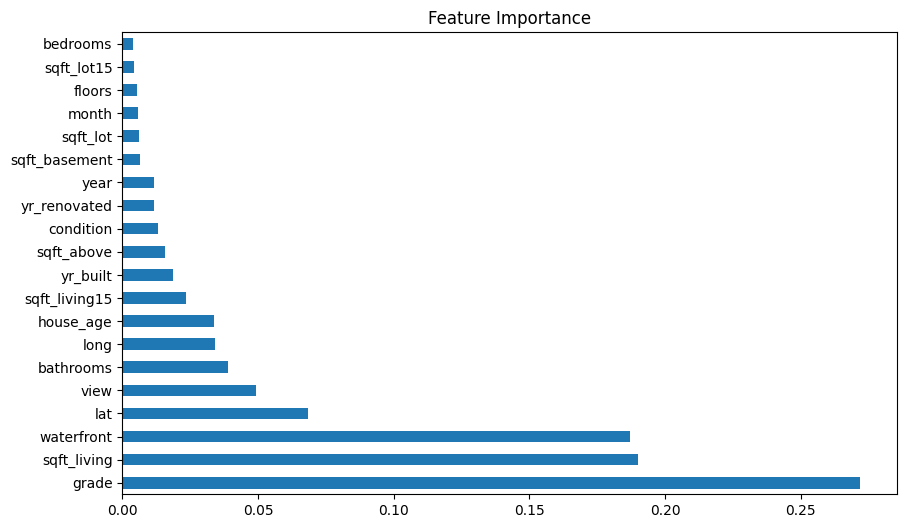

In [26]:
# Feature importance
plt.figure(figsize=(10,6))
feat_importances = pd.Series(xgb.feature_importances_, index=df.drop('price', axis=1).columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.title('Feature Importance')

In [27]:
pred_df_hp =pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_test_pred,'Difference':y_test-y_test_pred})
pred_df_hp

,Actual Value,Predicted Value,Difference
735,365000.0,3.908148e+05,-25814.78125
2830,865000.0,9.157963e+05,-50796.31250
4106,1038000.0,1.096429e+06,-58428.75000
16218,1490000.0,2.225812e+06,-735811.50000
19964,711000.0,7.496503e+05,-38650.31250
...,...,...,...
13674,338000.0,3.224224e+05,15577.59375
20377,673000.0,6.781056e+05,-5105.56250
8805,285000.0,3.155002e+05,-30500.15625
10168,605000.0,5.982980e+05,6702.00000


### Conclusion: XGBoost model is the best model which give better accuracy (87.01%) without Hyperparamter Tuning.

## Testing on Unseen (new) data

In [28]:
# testing the model on new data
new_data = df.drop('price', axis=1).iloc[0].values.reshape(1, -1)
new_data

array([[ 3.00000e+00,  1.00000e+00,  1.18000e+03,  5.65000e+03,
         1.00000e+00,  0.00000e+00,  0.00000e+00,  3.00000e+00,
         7.00000e+00,  1.18000e+03,  0.00000e+00,  1.95500e+03,
         0.00000e+00,  4.75112e+01, -1.22257e+02,  1.34000e+03,
         5.65000e+03,  2.01400e+03,  1.00000e+01,  5.90000e+01]])

In [29]:
# scaling the new data
new_data = scaler.transform(new_data)
new_data

array([[-0.39526335, -1.45258323, -0.985256  , -0.23556614, -0.91959976,
        -0.08499166, -0.30591651, -0.62542567, -0.55868959, -0.73753689,
        -0.65631017, -0.54725545, -0.20829394, -0.35491059, -0.30507313,
        -0.94376477, -0.25704623, -0.68884041,  1.09859931,  0.53629123]])

In [30]:
# Predicting the price of the house
price = xgb.predict(new_data)
print(f"The price of the house is: {price[0]:.2f}")

The price of the house is: 203712.47


In [31]:
# Actual price of the house
actual_price = df['price'].iloc[0]
print(f"The actual price of the house is: {actual_price:.2f}")

# Difference between actual and predicted price
difference = actual_price - price[0]
print(f"The difference between actual and predicted price is: {difference:.2f}")

The actual price of the house is: 221900.00
The difference between actual and predicted price is: 18187.53


## Saving the Model and Transformer

In [36]:
# Save the model
# make artifacts directory outside of the notebook folder to save the model and scaler
if not os.path.exists('../artifacts'):
    os.makedirs('../artifacts')

joblib.dump(xgb, '../artifacts/xgb_model.pkl')
joblib.dump(scaler, '../artifacts/scaler.pkl')

print("Model and Scaler are saved successfully!")

Model and Scaler are saved successfully!
